<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/hand_writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code is from [Deep Learning with Python](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438) by Francois Chollet.  He wrote the Keras deep learning SDK while working for Google.


28 x 28 pixel images.   So the size of each image is 28 x 28 pixels.  This is very low resolution.  



The image encoding system that uses a range of 0-255 for pixel values is typically referred to as 8-bit grayscale encoding. In this system each pixel value is represented by an 8-bit integer.
The range of values is from 0 (black) to 255 (white), with 254 shades of gray in between.


##Loss Function
A loss function is a mathematical function used in machine learning to measure the difference between the predicted output of a model and the actual target values. It quantifies how well or poorly the model is performing. The goal of training a model is to minimize the loss function.  The sparse_categorical_crossentropy loss function is used in machine learning for multi-class classification problems where the target labels are integers (i.e., not one-hot encoded).

##Activation Function
An activation function is a mathematical function applied to the output of a neuron in a neural network. It introduces non-linearity into the model, allowing it to learn complex patterns. Common activation functions include ReLU, sigmoid, and softmax.

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import layers



from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
train_images.shape

(60000, 28, 28)

In [56]:
train_images[4,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [57]:
len(train_labels)

60000

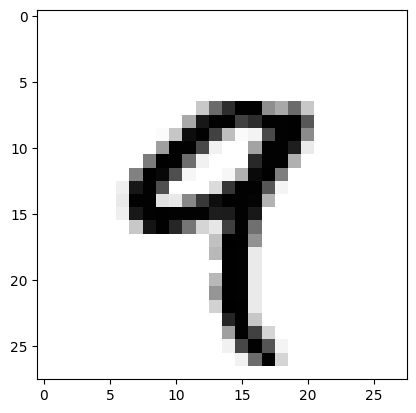

In [58]:


# Example: Flattened image
flattened_digit = train_images[4].reshape(-1)  # Simulate a flattened image

# Reshape the flattened image back to 28x28
reshaped_digit = flattened_digit.reshape(28, 28)

plt.imshow(reshaped_digit, cmap=plt.cm.binary)

In [59]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

grayscale handwritten images

In [60]:
test_images.shape

(10000, 28, 28)

In [61]:
len(test_labels)

10000

In [62]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)


* 2nd layer is softmax layer of 10 scalars, each a percentage that the image classification is correct

* 512 units: This means the layer has 512 neurons. The choice of 512 units is somewhat arbitrary but is typically based on experimentation and empirical results showing that a certain number of units work well for the task

* ReLU activation: The ReLU (Rectified Linear Unit) activation function is commonly used in hidden layers of neural networks. It introduces non-linearity into the model, enabling it to learn more complex patterns. ReLU is computationally efficient and helps mitigate the vanishing gradient problem, which is beneficial for training deep networks.


* Input Layer: Not explicitly defined in the Sequential model, but implicitly the input to the first Dense layer (784 input features, one for each pixel of the 28x28 images).

* Hidden Layer: The first Dense layer with 512 units and ReLU activation.

* Output Layer: The second Dense layer with 10 units and softmax activation.


In [63]:


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

We pick:

* **loss function** measure performance on training data

* **optimizer** how the model will update itself based upon the loss function

* ** metrics to monitor** will use accuracy

In [64]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [65]:
# change shape to (60000, 784).  this will still include all images since it is the product of 28 x 28 pixels

# divide by 255 to scale between 0 and 1


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255



In [66]:
train_images.shape

(60000, 784)

In [67]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2507 - accuracy: 0.9270 - val_loss: 0.1475 - val_accuracy: 0.9568
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1003 - accuracy: 0.9696 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.0907 - val_accuracy: 0.9729
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0865 - val_accuracy: 0.9738
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0779 - val_accuracy: 0.9771
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0256 - accuracy: 0.9926 - val_loss: 0.0806 - val_accuracy: 0.9793
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0879 - val_accuracy: 0.9773
Epoch 

In [68]:
test_digits = test_images[0:1]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 39ms/step


array([1.6718626e-12, 9.8150166e-13, 5.0340374e-11, 7.6983483e-08,
       3.1476205e-18, 7.9933652e-14, 1.0346435e-16, 9.9999988e-01,
       7.1120800e-13, 9.4888497e-09], dtype=float32)

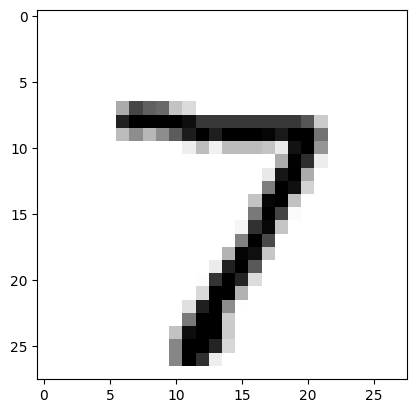

In [69]:


# Example: Flattened image
flattened_digit = test_images[0].reshape(-1)  # Simulate a flattened image

# Reshape the flattened image back to 28x28
reshaped_digit = flattened_digit.reshape(28, 28)

plt.imshow(reshaped_digit, cmap=plt.cm.binary)

In [70]:
#The numpy.argmax() function returns the indices of the maximum values along an axis of a NumPy array.

predictions[0].argmax()

7

In [71]:
predictions[0]

array([1.6718626e-12, 9.8150166e-13, 5.0340374e-11, 7.6983483e-08,
       3.1476205e-18, 7.9933652e-14, 1.0346435e-16, 9.9999988e-01,
       7.1120800e-13, 9.4888497e-09], dtype=float32)

In [72]:
predictions[0][7]

0.9999999

In [73]:
test_labels[0]

7

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9789
test_acc: 0.9789000153541565


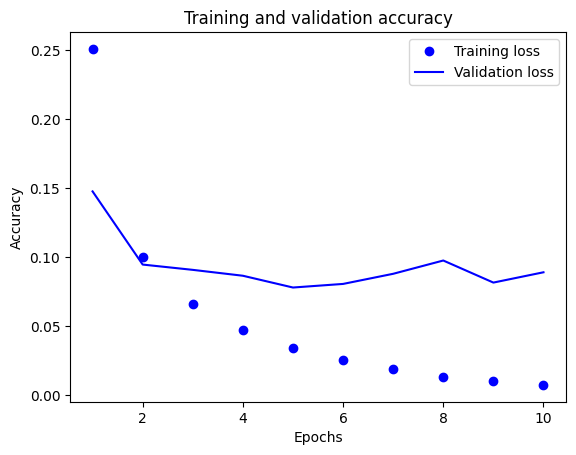

In [75]:
# Extract accuracy values
acc = history.history['loss']
val_loss = history.history['val_loss']

# Extract epoch numbers
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

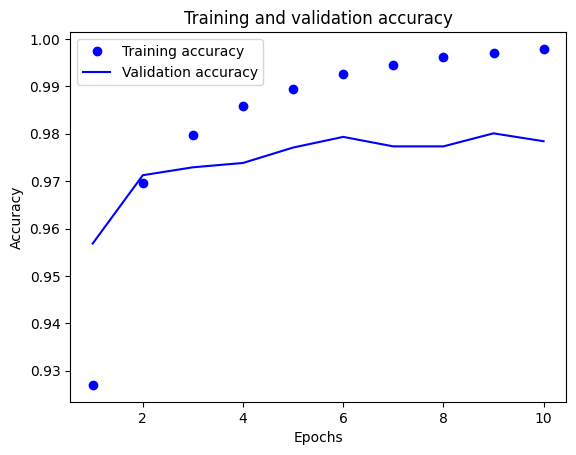

In [76]:
# Extract accuracy values
acc = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Extract epoch numbers
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()